<a href="https://colab.research.google.com/github/sathvikb007/Image-Clustering-with-Autoencoders/blob/master/simAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers import *
from keras.models import Model
from keras.datasets import mnist
from keras import regularizers
from keras import optimizers
from keras.optimizers import RMSprop
from keras import backend as K
import scipy
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea
import pandas as pd
import numpy as np
import tensorflow as tf


Using TensorFlow backend.


In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)


In [0]:
x_train = x_train.reshape(60000,784)/255
y_train = y_train.reshape(60000,1)
x_test = x_test.reshape(10000, 784)/255
y_test = y_test.reshape(10000,1)

In [0]:
  label_dict = {  0	:"Tshirt ", 1	:"Trouser" , 2	:"Pullover" ,3	: "Dress" ,4	:"Coat" ,5	:"Sandal" ,6	:"Shirt" ,7	:"Sneaker",8	:" Bag" ,9	:"Ankle boot"}

In [0]:
x_train = np.hstack((y_train, x_train))

In [0]:
xlabels=[]
for i in range(60000):
  xlabels.append(label_dict[y_train[i,0]])

xlabels = np.array(xlabels)

In [0]:
xlabels.reshape(60000,1)
print(xlabels.shape)
print(x_train.shape)

(60000,)
(60000, 784)


In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(x_train)

In [0]:
yPred = kmeans.predict(x_train)

In [0]:
ytrainlist = y_train.reshape(60000,).tolist()
ypredlist = yPred.tolist()

In [0]:
print(ytrainlist)

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 1, 6, 3, 1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7, 9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8, 8, 0, 1, 1, 6, 8, 1, 9, 7, 8, 8, 9, 6, 6, 3, 1, 5, 4, 6, 7, 5, 5, 9, 2, 2, 2, 7, 6, 4, 1, 8, 7, 7, 5, 4, 2, 9, 1, 7, 4, 6, 9, 7, 1, 8, 7, 1, 2, 8, 0, 9, 1, 8, 7, 0, 5, 8, 6, 7, 2, 0, 8, 7, 1, 6, 2, 1, 9, 6, 0, 1, 0, 5, 5, 1, 7, 0, 5, 8, 4, 0, 4, 0, 6, 6, 4, 0, 0, 4, 7, 3, 0, 5, 8, 4, 1, 1, 2, 9, 2, 8, 5, 0, 6, 3, 4, 6, 0, 9, 1, 7, 3, 8, 5, 8, 3, 8, 5, 2, 0, 8, 7, 0, 3, 5, 0, 6, 5, 2, 7, 5, 2, 6, 8, 2, 6, 8, 0, 4, 4, 4, 4, 4, 1, 5, 6, 5, 3, 3, 7, 3, 3, 6, 2, 8, 4, 6, 5, 9, 3, 2, 3, 2, 4, 4, 8, 2, 5, 3, 0, 7, 2, 0, 2, 5, 7, 2, 3, 1, 7, 6, 2, 9, 1, 9, 1, 1, 8, 7, 8, 4, 2, 6, 6, 7, 9, 4, 6, 1, 9, 5, 6, 0, 5, 0, 1, 6, 1, 1, 6, 7, 4, 4, 8, 6, 4, 6, 9, 3, 7, 5, 0, 8, 3, 4, 0, 3, 3, 2, 0, 1, 0, 3, 

In [0]:
for i in range(60000):
  if yPred[i]==1:
    print( str(i) + " " + str(y_train[i,0]) + " " + str(label_dict[y_train[i,0]]) + " " + str(yPred[i]) )


3 3 Dress 1
22 4 Coat 1
28 4 Coat 1
36 5 Sandal 1
37 2 Pullover 1
54 2 Pullover 1
57 8  Bag 1
61 0 Tshirt  1
72 6 Shirt 1
95 6 Shirt 1
104 6 Shirt 1
118 6 Shirt 1
123 2 Pullover 1
125 2 Pullover 1
127 6 Shirt 1
134 4 Coat 1
140 6 Shirt 1
164 6 Shirt 1
166 1 Trouser 1
180 0 Tshirt  1
183 6 Shirt 1
184 6 Shirt 1
187 0 Tshirt  1
207 0 Tshirt  1
215 3 Dress 1
235 6 Shirt 1
239 4 Coat 1
252 6 Shirt 1
256 6 Shirt 1
260 2 Pullover 1
261 3 Dress 1
262 2 Pullover 1
291 2 Pullover 1
292 6 Shirt 1
302 0 Tshirt  1
325 0 Tshirt  1
344 6 Shirt 1
346 6 Shirt 1
353 6 Shirt 1
354 0 Tshirt  1
356 8  Bag 1
359 1 Trouser 1
361 6 Shirt 1
367 6 Shirt 1
377 0 Tshirt  1
388 4 Coat 1
402 6 Shirt 1
405 2 Pullover 1
408 8  Bag 1
412 4 Coat 1
429 0 Tshirt  1
433 4 Coat 1
440 2 Pullover 1
444 0 Tshirt  1
445 0 Tshirt  1
448 0 Tshirt  1
449 2 Pullover 1
462 2 Pullover 1
470 6 Shirt 1
480 6 Shirt 1
483 2 Pullover 1
484 2 Pullover 1
485 6 Shirt 1
489 0 Tshirt  1
501 2 Pullover 1
505 2 Pullover 1
506 6 Shirt 1
522 0 T

In [0]:
pred_to_label = {0:8, }

In [0]:
unique_elements, counts_elements = np.unique(yPred, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1    2    3    4    5    6    7    8    9]
 [2347 7466 9619 2569 2903 6572 4292 7391 9078 7763]]


In [0]:
from sklearn import metrics
print(metrics.adjusted_rand_score(ytrainlist, ypredlist))

0.3479167105930663


In [0]:
df = pd.DataFrame(x_train)


In [0]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,0.160784,0.737255,0.403922,0.211765,0.188235,0.168627,0.341176,0.658824,0.521569,0.062745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.192157,0.533333,0.858824,0.847059,0.894118,...,0.956863,0.941176,0.952941,0.839216,0.878431,0.635294,0.000000,0.007843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.000000,0.000000,0.545098,0.572549,0.509804,0.529412,0.529412,0.537255,0.490196,0.486275,0.490196,0.474510,0.466667,0.447059,0.509804,0.298039,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,0.462745,0.094118,0.000000,0.000000,0.000000,0.000000,0.000000,0.188235,0.345098,0.019608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.047059,0.392157,0.831373,0.803922,...,0.415686,0.400000,0.294118,0.039216,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.070588,0.164706,0.223529,0.219608,0.125490,0.031373,0.000000,0.000000,0.003922,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,0.686275,0.611765,0.250980,0.054902,0.211765,0.537255,0.800000,0.760784,0.400000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.286275,0.729412,0.694118,0.717647,0.686275,0.737255,...,0.325490,0.596078,0.333333,0.627451,0.521569,0.392157,0.047059,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.015686,0.000000,0.007843,0.000000,0.137255,0.015686,0.129412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101961,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.741176,0.807843,0.733333,0.125490,...,1.000000,0.949020,1.000000,0.274510,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.239216,0.400000,0.658824,0.098039,0.000000,0.545098,0.631373,0.290196,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000

In [0]:
#size of our encoded representations
encoding_dim = 49 

input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [0]:
#create the encoder model
encoder = Model(input_img, encoded)

In [0]:
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [0]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=False,
                validation_data=(x_test, x_test))




Train on 60000 samples, validate on 10000 samples
Epoch 1/100





60000/60000 [==============================] - 10s 173us/step - loss: 0.1175 - val_loss: 0.0892
Epoch 2/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.0809 - val_loss: 0.0719
Epoch 3/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0665 - val_loss: 0.0612
Epoch 4/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0585 - val_loss: 0.0557
Epoch 5/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0542 - val_loss: 0.0522
Epoch 6/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0510 - val_loss: 0.0493
Epoch 7/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0482 - val_loss: 0.0468
Epoch 8/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0458 - val_loss: 0.0446
Epoch 9/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0438 - val

In [0]:
SAE_encoded_imgs_train = encoder.predict(x_train)                   #contains all the encoded images of the training set
SAE_decoded_imgs_train = decoder.predict(SAE_encoded_imgs_train)    #contains all the reconstructed images of the training set

SAE_encoded_imgs_test = encoder.predict(x_test)                     #contains all the encoded images of the test set
SAE_decoded_imgs_test = decoder.predict(SAE_encoded_imgs_test)      #contains all the reconstructed images of the test set

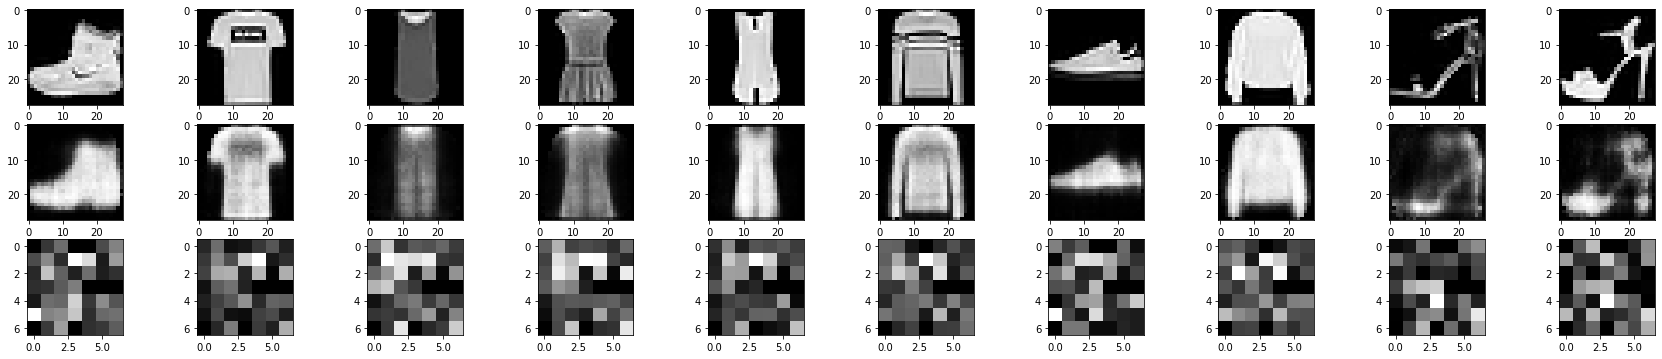

In [0]:
# To display original image , reconstructed image and latent representation of each image in a lower dimension

n = 10
plt.figure(figsize=(30,6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.gray()
    plt.imshow(x_train[i].reshape(28, 28))
    
    

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(SAE_decoded_imgs_train[i].reshape(28, 28))

    #display latent representation
    ax = plt.subplot(3, n, i+1+ n*2)
    plt.imshow(SAE_encoded_imgs_train[i].reshape(7,7))
   
plt.show()

In [0]:
df2 = pd.DataFrame(SAE_decoded_imgs_train)

In [0]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,6.258488e-07,1.490116e-07,1.490116e-07,9.238720e-07,4.470348e-07,2.086163e-07,4.172325e-07,0.000006,0.000362,0.000171,0.000219,0.000473,0.002003,0.004982,0.013922,0.005425,0.003111,0.001560,0.001038,0.000004,7.152557e-07,1.668930e-06,2.980232e-07,0.000001,1.609325e-06,8.344650e-07,0.000002,1.043081e-06,0.000006,8.940697e-07,2.682209e-07,2.086163e-07,1.370907e-06,0.000005,0.000676,0.001093,0.000702,0.000106,0.000173,0.000483,...,0.000443,0.000766,0.000883,0.000898,0.004311,0.005428,0.005333,0.006105,0.017033,0.016527,0.000010,3.576279e-07,0.000000e+00,1.311302e-06,4.172325e-07,5.066395e-07,0.000649,0.002991,0.011300,0.005084,0.002480,0.003102,0.003241,0.001524,0.001660,0.001122,0.000818,0.000429,0.000571,0.000424,0.000410,0.000422,0.001211,0.003126,0.006749,0.007014,0.000023,0.000031,2.980232e-07,9.834766e-07
1,7.271767e-06,6.258488e-07,2.980232e-07,1.937151e-06,8.642673e-06,3.278255e-07,4.857779e-06,0.000028,0.006582,0.152846,0.329087,0.439266,0.332681,0.237109,0.230684,0.287336,0.434167,0.466455,0.216823,0.000018,3.576279e-07,3.576279e-07,3.010035e-06,0.000028,3.516674e-06,1.192093e-06,0.000004,6.854534e-07,0.000097,1.013279e-06,1.788139e-07,9.536743e-07,1.013279e-06,0.000013,0.196948,0.375410,0.676832,0.851648,0.875272,0.888943,...,0.892500,0.890347,0.907969,0.920839,0.820234,0.550592,0.034598,0.002940,0.003555,0.007266,0.000017,1.937151e-06,3.457069e-06,5.751848e-06,7.748604e-07,1.215935e-05,0.006248,0.002876,0.009236,0.168814,0.444427,0.484514,0.521489,0.591059,0.588617,0.629617,0.670921,0.558240,0.627227,0.524227,0.477454,0.468307,0.441327,0.075941,0.003682,0.005654,0.000090,0.000059,8.404255e-06,7.301569e-06
2,1.516789e-03,6.597936e-04,6.544590e-04,3.332198e-04,1.493216e-03,5.348623e-04,7.626116e-04,0.001985,0.033058,0.100149,0.244915,0.348078,0.350662,0.294138,0.285307,0.344674,0.377430,0.315941,0.218394,0.004235,7.169843e-04,8.930862e-04,1.275718e-03,0.002567,7.332861e-04,8.653402e-04,0.001521,5.258322e-04,0.001914,4.296899e-04,5.736649e-04,8.796751e-04,6.947815e-04,0.002171,0.031080,0.051309,0.101737,0.264165,0.493466,0.655633,...,0.268035,0.258323,0.207419,0.135373,0.094019,0.055803,0.044322,0.034323,0.027596,0.017998,0.001355,8.383691e-04,1.007825e-03,7.387698e-04,1.083732e-03,1.201332e-03,0.030163,0.022586,0.025461,0.033438,0.048741,0.072293,0.099476,0.124779,0.136848,0.140416,0.120128,0.128799,0.138480,0.126989,0.108311,0.064073,0.046762,0.032399,0.038584,0.026747,0.003745,0.002352,1.079082e-03,1.564503e-03
3,7.085800e-04,1.668334e-04,1.816750e-04,1.410246e-04,4.946887e-04,1.497269e-04,2.600551e-04,0.000735,0.030432,0.442060,0.686803,0.588511,0.334123,0.220991,0.233852,0.285048,0.496921,0.681850,0.563636,0.001676,2.459288e-04,1.012385e-04,3.660023e-04,0.001843,2.801716e-04,1.490414e-04,0.000680,1.510382e-04,0.001747,1.432598e-04,1.446009e-04,1.825094e-04,1.794100e-04,0.000919,0.209463,0.532857,0.756515,0.932900,0.946212,0.885396,...,0.374861,0.390572,0.392567,0.426436,0.557578,0.495219,0.178046,0.063198,0.025080,0.023716,0.000701,2.216101e-04,4.794896e-04,2.263486e-04,2.583563e-04,5.316436e-04,0.026179,0.043782,0.090573,0.162548,0.165640,0.175878,0.136180,0.158109,0.143384,0.153945,0.141360,0.165957,0.164216,0.190029,0.197659,0.189856,0.162722,0.178939,0.084801,0.042584,0.001118,0.001638,5.335808e-04,1.124293e-03
4,1.466274e-05,1.162291e-06,7.450581e-07,4.172325e-07,6.794930e-06,7.152557e-07,1.639128e-06,0.000013,0.002195,0.157799,0.328353,0.220452,0.119503,0.087666,0.122026,0.111813,0.156608,0.225514,0.152559,0.000029,1.013279e-06,1.370907e-06,1.847744e-06,0.000032,1.579523e-06,1.400709e-06,0.000005,1.072884e-06,0.000046,7.450581e-07,4.768372e-07,1.668930e-06,7.748604e-07,0.000017,0.016225,0.057880,0.328890,0.691061,0.830082,0.705474,...,0.8

In [0]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,0.160784,0.737255,0.403922,0.211765,0.188235,0.168627,0.341176,0.658824,0.521569,0.062745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.192157,0.533333,0.858824,0.847059,0.894118,...,0.956863,0.941176,0.952941,0.839216,0.878431,0.635294,0.000000,0.007843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.000000,0.000000,0.545098,0.572549,0.509804,0.529412,0.529412,0.537255,0.490196,0.486275,0.490196,0.474510,0.466667,0.447059,0.509804,0.298039,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,0.462745,0.094118,0.000000,0.000000,0.000000,0.000000,0.000000,0.188235,0.345098,0.019608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.047059,0.392157,0.831373,0.803922,...,0.415686,0.400000,0.294118,0.039216,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.070588,0.164706,0.223529,0.219608,0.125490,0.031373,0.000000,0.000000,0.003922,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,0.686275,0.611765,0.250980,0.054902,0.211765,0.537255,0.800000,0.760784,0.400000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.286275,0.729412,0.694118,0.717647,0.686275,0.737255,...,0.325490,0.596078,0.333333,0.627451,0.521569,0.392157,0.047059,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.015686,0.000000,0.007843,0.000000,0.137255,0.015686,0.129412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101961,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.741176,0.807843,0.733333,0.125490,...,1.000000,0.949020,1.000000,0.274510,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.239216,0.400000,0.658824,0.098039,0.000000,0.545098,0.631373,0.290196,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000

In [0]:
import numpy as np
import mnist_reader
trainX, trainy = mnist_reader.load_mnist('data/fashion', kind='train')
testX, testy = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [0]:
SAE_encoded_imgs_train.shape

(60000, 49)

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=101).fit(SAE_encoded_imgs_train)

In [0]:
ypredenc = kmeans.predict(SAE_encoded_imgs_train).tolist()

In [0]:
y_train = y_train.reshape(60000,).tolist()

AttributeError: ignored

In [0]:
len(y_train)

60000

In [0]:
from sklearn import metrics
print(metrics.adjusted_rand_score(y_train, ypredenc))

0.30078545566122916
